# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_list=[]
lat=[]
lng = []
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date = []
citycount = 0
for city in cities:
    citycount += 1
    print(f"Processing City number {citycount}, {city}")
    try:
        #The reason I set everything to a var first is so if an exception occurs in the middle
        #of getting info, it doesn't add a portion of data and make uneven list lengths. 
        query_to_check = query_url + city
        response = requests.get(query_url + city).json()
        lattitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        max_temperature = response["main"]["temp_max"]
        humidity_level = response["main"]["humidity"]
        cloudiness_level = response["clouds"]["all"]
        wind_speed_level = response["wind"]["speed"]
        country_abbreviation = response["sys"]["country"]
        target_date = response["dt"]
        lat.append(lattitude)
        lng.append(longitude)
        max_temp.append(max_temperature)
        humidity.append(humidity_level)
        cloudiness.append(cloudiness_level)
        wind_speed.append(wind_speed_level)
        country.append(country_abbreviation)
        date.append(target_date)
        city_list.append(city)
    except:
        print("Could not process this city. Skipping...")


Processing City number 1, pacific grove
Processing City number 2, laguna
Processing City number 3, miri
Processing City number 4, veraval
Processing City number 5, dikson
Processing City number 6, castro
Processing City number 7, vaini
Processing City number 8, butaritari
Processing City number 9, hilo
Processing City number 10, cape town
Processing City number 11, geraldton
Processing City number 12, atuona
Processing City number 13, xiangdong
Could not process this city. Skipping...
Processing City number 14, barrow
Processing City number 15, ahipara
Processing City number 16, puerto ayora
Processing City number 17, barentsburg
Could not process this city. Skipping...
Processing City number 18, thompson
Processing City number 19, lebu
Processing City number 20, brae
Processing City number 21, palabuhanratu
Could not process this city. Skipping...
Processing City number 22, belushya guba
Could not process this city. Skipping...
Processing City number 23, ushuaia
Processing City number

Processing City number 201, mount isa
Processing City number 202, carndonagh
Processing City number 203, aleksandrov gay
Processing City number 204, pisco
Processing City number 205, acapulco
Processing City number 206, torbay
Processing City number 207, kalmar
Processing City number 208, constitucion
Processing City number 209, tezu
Processing City number 210, sur
Processing City number 211, caravelas
Processing City number 212, divinopolis
Processing City number 213, vagur
Processing City number 214, new norfolk
Processing City number 215, qaanaaq
Processing City number 216, vao
Processing City number 217, korla
Processing City number 218, esperance
Processing City number 219, carnarvon
Processing City number 220, betong
Processing City number 221, fuxin
Processing City number 222, honningsvag
Processing City number 223, banmo
Could not process this city. Skipping...
Processing City number 224, grand-lahou
Processing City number 225, kawerau
Processing City number 226, yarada
Process

Processing City number 400, plouzane
Processing City number 401, belaya gora
Processing City number 402, pirai do sul
Processing City number 403, tateyama
Processing City number 404, khonuu
Could not process this city. Skipping...
Processing City number 405, mumford
Processing City number 406, port lincoln
Processing City number 407, remanso
Processing City number 408, port hedland
Processing City number 409, bengkulu
Processing City number 410, komsomolskiy
Processing City number 411, acajutla
Processing City number 412, nanchang
Processing City number 413, mus
Processing City number 414, baruun-urt
Processing City number 415, kyren
Processing City number 416, yuzhno-yeniseyskiy
Could not process this city. Skipping...
Processing City number 417, nguiu
Could not process this city. Skipping...
Processing City number 418, sisimiut
Processing City number 419, zhigansk
Processing City number 420, solginskiy
Processing City number 421, hambantota
Processing City number 422, opuwo
Processin

Processing City number 601, bahile
Processing City number 602, ipixuna
Processing City number 603, alofi
Processing City number 604, watsa
Processing City number 605, teguise
Processing City number 606, dingzhou
Processing City number 607, scottsbluff
Processing City number 608, magistralnyy
Processing City number 609, anchorage
Processing City number 610, kargasok
Processing City number 611, zyryanka
Processing City number 612, santa cruz
Processing City number 613, hualmay
Processing City number 614, broken hill
Processing City number 615, bhuj
Processing City number 616, mnogovershinnyy
Processing City number 617, ituni
Could not process this city. Skipping...
Processing City number 618, achacachi
Processing City number 619, montevideo
Processing City number 620, puerto madryn
Processing City number 621, manadhoo
Processing City number 622, macaboboni
Could not process this city. Skipping...
Processing City number 623, virginia beach
Processing City number 624, ust-maya
Processing C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:

weather_dict = {
    "City": city_list,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [40]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.62,-121.92,70.00,56,40,14.99,US,1595451206
1,laguna,38.42,-121.42,84.00,39,1,12.75,US,1595451206
2,miri,4.41,114.01,75.20,94,40,2.24,MY,1595451491
3,veraval,20.90,70.37,83.28,82,100,13.29,IN,1595451496
4,dikson,73.51,80.55,39.96,93,27,7.76,RU,1595451476


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
weather_data = weather_data.loc[weather_data['Humidity'] < 101]
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.289808,21.142339,68.193682,71.273997,49.572426,7.843089,1.595451e+09
std,34.032458,88.576383,13.918879,19.732564,38.077769,5.381406,1.810938e+02
min,-54.800000,-175.200000,23.000000,9.000000,0.000000,0.110000,1.595451e+09
25%,-8.140000,-54.960000,57.200000,59.000000,4.000000,3.670000,1.595451e+09
50%,26.170000,23.370000,69.800000,75.000000,45.000000,6.930000,1.595452e+09
75%,51.380000,102.270000,78.210000,87.000000,90.000000,10.290000,1.595452e+09
max,78.220000,178.420000,105.310000,100.000000,100.000000,31.090000,1.595452e+09


In [49]:
#  Get the indices of cities that have humidity over 100%.
weather_data.index[weather_data['Humidity'] > 100]

Int64Index([], dtype='int64')

Clearly there is no humidity with over 100, so there's nothing to clean...

In [45]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_data.to_csv('city_data.csv')

In [3]:
#THIS IS WHAT IS CALLED TO IMPORT THE DATA FRAME THAT I NEED TO PLOT IN CASE THE NOTEBOOK IS EXITED. SINCE IT IS RANDOM
city_data = pd.read_csv('city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

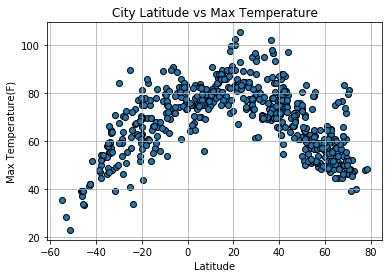

In [4]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker = 'o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature")
plt.grid()
plt.savefig('Plot Images/LatvMaxTemp.png')
plt.show()

## Latitude vs. Humidity Plot

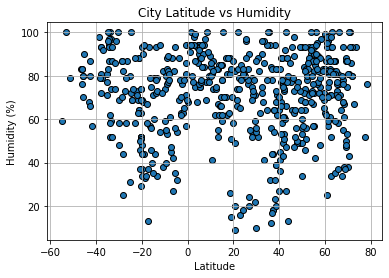

In [5]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker = 'o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()
plt.savefig('Plot Images/LatvHumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

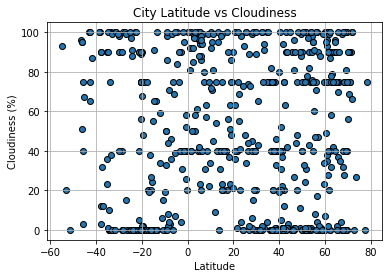

In [6]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker = 'o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()
plt.savefig('Plot Images/LatvCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

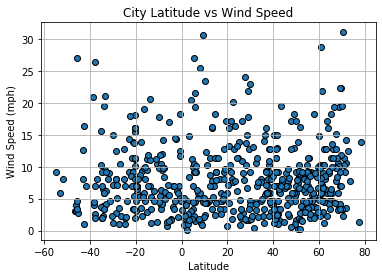

In [7]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker = 'o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig('Plot Images/LatvWindSpeed.png')
plt.show()

## Linear Regression

In [4]:
# OPTIONAL: Create a function to create Linear Regression plots
def linregression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return(rvalue, regress_values, line_eq)

In [6]:
# Create Northern and Southern Hemisphere DataFrames
north = city_data.loc[city_data["Lat"] >= 0]
south = city_data.loc[city_data["Lat"] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4723616248677331


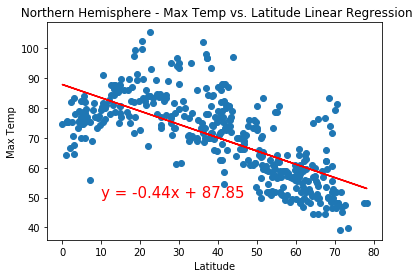

In [8]:
xvalues = north["Lat"]
yvalues = north["Max Temp"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (10,50), fontsize=15,color="red")
plt.title(" Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('Plot Images/NorthTempvsLatitude.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6088291141556335


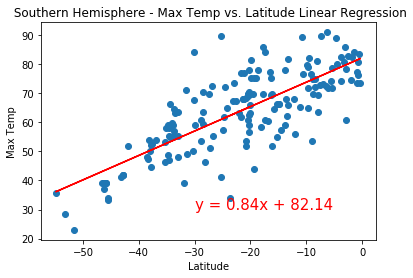

In [9]:
xvalues = south["Lat"]
yvalues = south["Max Temp"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (-30,30), fontsize=15,color="red")
plt.title(" Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig('Plot Images/SouthTempvsLatitude.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004943370958592055


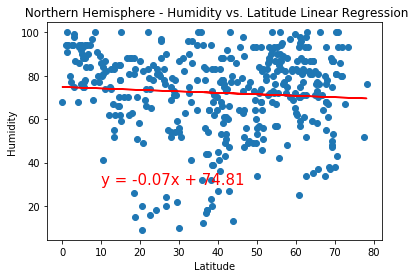

In [12]:
xvalues = north["Lat"]
yvalues = north["Humidity"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (10,30), fontsize=15,color="red")
plt.title(" Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig('Plot Images/NorthHumidityvsLatitude.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07303686324155928


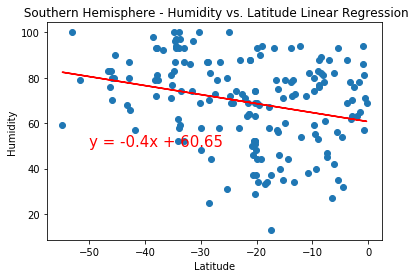

In [13]:
xvalues = south["Lat"]
yvalues = south["Humidity"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (-50,50), fontsize=15,color="red")
plt.title(" Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.savefig('Plot Images/SouthHumidityvsLatitude.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0060549432600874985


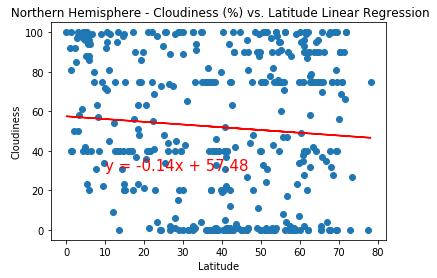

In [14]:
xvalues = north["Lat"]
yvalues = north["Cloudiness"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (10,30), fontsize=15,color="red")
plt.title(" Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('Plot Images/NorthCloudinessvsLatitude.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011777037927961073


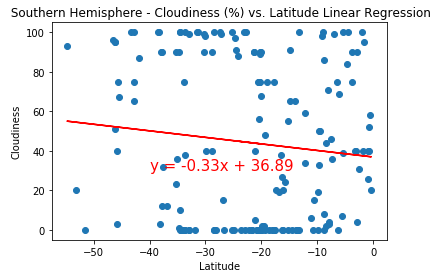

In [15]:
xvalues = south["Lat"]
yvalues = south["Cloudiness"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (-40,30), fontsize=15,color="red")
plt.title(" Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig('Plot Images/SouthCloudinessvsLatitude.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0015275291418928609


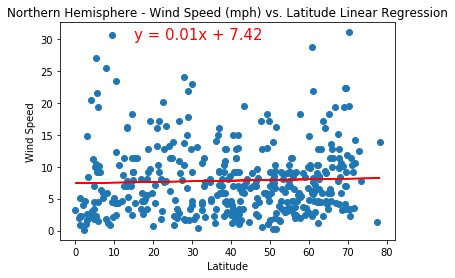

In [16]:
xvalues = north["Lat"]
yvalues = north["Wind Speed"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (15,30), fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('Plot Images/NorthWindSpeedvsLatitude.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00011734571769767726


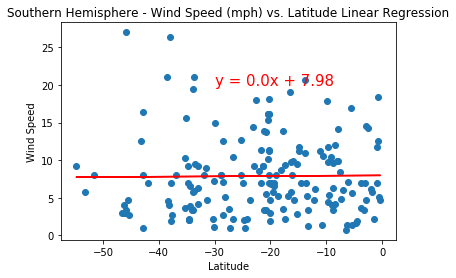

In [17]:
xvalues = south["Lat"]
yvalues = south["Wind Speed"]
(r_value, regression_vals, equation) = linregression(xvalues, yvalues)
print(f"The r-squared is: {r_value**2}")
plt.scatter(xvalues, yvalues)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(xvalues,regression_vals,"r-")
plt.annotate(equation, (-30,20), fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.savefig('Plot Images/SouthWindSpeedvsLatitude.png')
plt.show()

## 3 Observable Trends
1. The first trend that I can notice is how when it comes to max temperature and latitude. Judging on latitude acting like a horizontal line for the Earth, I see a huge spike when it comes to the latitude approaching zero. This makes sense because that is closer to the equater, the hottest parts of the Earth, and then as it goes away from 0, the max temperature goes down, getting away from the equator.

2. Another trend I see is when it comes to Wind Speed. It seems as if there is much more of a cluster when it comes to wind speeds around 0-10. That means that of all the places I requested, it doesn't seem to be very windy in general, and when it comes to the northern vs southern hemisphere, the northern hemisphere had a lot less samples plotted, however, the trends stayed basically the same. Meaning, there is a pretty good idea of what the average wind speed of a given location is, based on all 3 plots.

3. In general, it seems after splitting the dataset into southern and northern hemispheres, that there were more northern hemisphere cities and location. There could be a reason into this, potentially there are more actual cities found in the northern hemisphere compared to the southern. This is random, but one can definetly tell a discrepancy between the two. The only reason I can think is that the southern hemisphere contains more uninhabitable areas and less cities due to the weather conditions.